In [2]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import font_manager, rc
rc('font', family="AppleMyungjo")

##### 검정과 유의확률

In [2]:
### 검정의 예

15번 동전 던져서 12번이 앞면, 이 동전은 공정한 동전인가?
-> H0 : theta=0.5, HA : theta=!0.5,
        이항 분포 활용, 12번보다 더 앞면 많이 나오는 경우의 유의확률 계산
        N = 15, p = 0.5

In [5]:
1 - sp.stats.binom(15, 0.5).cdf(12-1)

0.017578125

트레이더가 장기적으로 손실을 보는가?
-> H0 : theta=0, HA : theta < 0 의 케이스,
        트레이더의 수익률이 정규분포를 따른다고 할때, t분포 활용하여 검정.

In [4]:
x = np.array([-0.025, -0.05, 0.043, -0.037, -0.056])
t = x.mean() / x.std(ddof=1) *np.sqrt(len(x))  #ddof : N-ddof로 std구하게 해준다.
t, sp.stats.t(df=4).cdf(t)

(-1.4025921414082105, 0.11669216509589829)

In [ ]:
### 유의 확률 계산

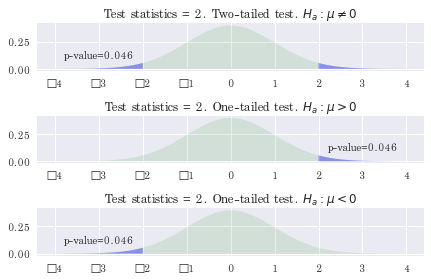

In [8]:
xx1 = np.linspace(-4, 4, 100)
xx2 = np.linspace(-4, -2, 100)
xx3 = np.linspace(2, 4, 100)

plt.subplot(3, 1, 1)

plt.fill_between(xx1, sp.stats.norm.pdf(xx1), facecolor='green', alpha=0.1)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.text(-3, 0.1, 'p-value=%5.3f' % (2*sp.stats.norm.cdf(-2)), horizontalalignment='center')
plt.title(r"Test statistics = 2. Two-tailed test. $H_a:\mu \neq 0$")

plt.subplot(3, 1, 2)

plt.fill_between(xx1, sp.stats.norm.pdf(xx1), facecolor='green', alpha=0.1)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.text(3, 0.1, 'p-value=%5.3f' % (2*sp.stats.norm.cdf(-2)), horizontalalignment='center')
plt.title(r"Test statistics = 2. One-tailed test. $H_a:\mu > 0$")

plt.subplot(3, 1, 3)

plt.fill_between(xx1, sp.stats.norm.pdf(xx1), facecolor='green', alpha=0.1)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.text(-3, 0.1, 'p-value=%5.3f' % (2*sp.stats.norm.cdf(-2)), horizontalalignment='center')
plt.title(r"Test statistics = 2. One-tailed test. $H_a:\mu < 0$")

plt.tight_layout()
plt.show()

##### Scipy를 사용한 기초적인 검정

In [ ]:
### 이항검정 (Binomial Test)

In [22]:
N = 10
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)   #<-1과 0으로 이루어진, 크기 N의 array
n = np.count_nonzero(x)  #<-x에서 0이 아닌 값의 개수
n

7

In [10]:
sp.stats.binom_test(n, N)

0.34374999999999989

In [12]:
N = 100
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [13]:
sp.stats.binom_test(n, N)

0.92041076261282062

In [14]:
N = 100
theta_0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

31

In [15]:
sp.stats.binom_test(n,N)

0.00018314322488235352

In [ ]:
### 카이제곱 검정(chisquare test)

In [28]:
N = 10
K = 4
theta_0 = np.ones(K) / K

np.random.seed(0)
x = np.random.choice(K, N, p=theta_0)  #0~K사이의 값으로 크기 N인 array작성 (p는 왜씀?)
n = np.bincount(x, minlength=K)  #x를 이루고 있는 값들의 개수 각각 세서 표시
n

array([0, 3, 5, 2])

In [17]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.1999999999999993, pvalue=0.157724450396663)

In [18]:
N = 100
K = 4
theta_0 = np.array([0.35, 0.30, 0.20, 0.15])

np.random.seed(0)
x = np.random.choice(K, N, p=theta_0)
n = np.bincount(x, minlength=K)
n

array([37, 32, 20, 11])

In [19]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=16.559999999999999, pvalue=0.00087034719789121269)

In [ ]:
### 단일 표본 z-검정 (One-sample z-test)

In [30]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [31]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean()-mu)/ np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

In [33]:
ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

In [34]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)

In [35]:
ztest_1samp(x)

(0.59808015534484993, 0.54978645086241684)

In [ ]:
### 단일 표본 t-검정 (One-sample t-test)

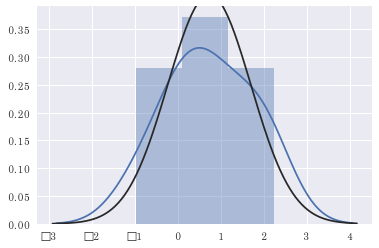

In [38]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=True, fit=sp.stats.norm)
plt.show()

In [39]:
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.2894396723896699, pvalue=0.047818464908570578)

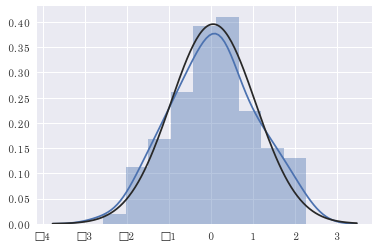

In [40]:
N = 100    #<-샘플수가 많아지면 정규분포에 가까워짐
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=True, fit=sp.stats.norm)
plt.show()

In [42]:
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=0.59042834028516977, pvalue=0.55624891586946745)

In [ ]:
### 독립 표본 t-검정(Independent-two-sample t-test)

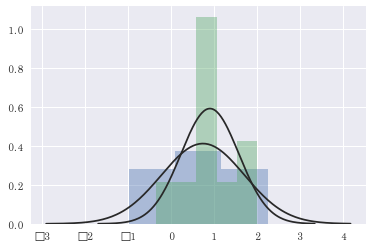

In [44]:
N_1 = 10; mu_1 = 0; sigma_1 = 1
N_2 = 10; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [46]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-0.41399685269886549, pvalue=0.68376768941164268)

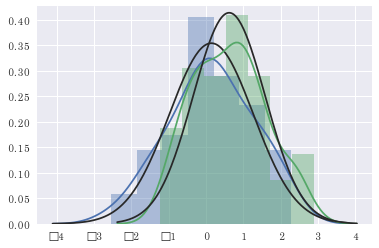

In [47]:
N_1 = 50; mu_1 = 0; sigma_1 = 1
N_2 = 100; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=True, fit=sp.stats.norm)
sns.distplot(x2, kde=True, fit=sp.stats.norm)

In [51]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-2.6826951236616963, pvalue=0.0081339709157226582)

In [ ]:
### 대응 표본 t-검정 (Paired-two-sample t-test)

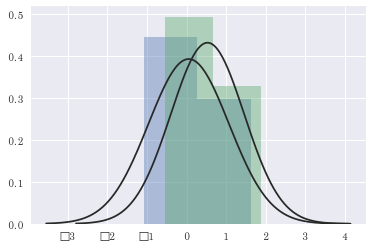

In [57]:
N = 5
mu_1 = 0
mu_2 = 0.5
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)   #<- 왜 더하지?
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [58]:
sp.stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-7.1723380661732756, pvalue=0.0020008849290622677)

In [ ]:
### 카이 제곱 분산 검정 (Chi-square Test for the Variance)

In [59]:
def chi2var_test(x, sigma2=1):
    v = x.var(ddof=1)
    t = (len(x)-1)*v/sigma2
    return t, sp.stats.chi2(df=len(x)-1).sf(np.abs(t))
    

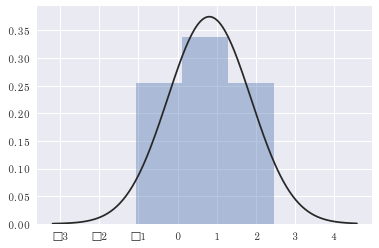

1.0637871321863899

In [61]:
N = 10
mu_0 = 0
sigma_0 = 1.1
np.random.seed(0)
x = sp.stats.norm(mu_0, sigma_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()
x.std()

In [62]:
chi2var_test(x)

(11.316430626053437, 0.25464123584764542)

In [ ]:
### 등분산 검정 (Equal-varianc test)

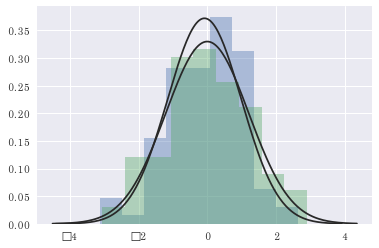

(1.0722637916563211, 1.2090475097933893)

In [3]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()
x1.std(), x2.std()

In [4]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=1.4164748780099408, pvalue=0.23398449336124169)

In [5]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=0.29621134095034851, pvalue=0.58626737659926542)

In [6]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=0.47902363547251242, pvalue=0.4896757448071295)

In [ ]:
### 정규성 검정

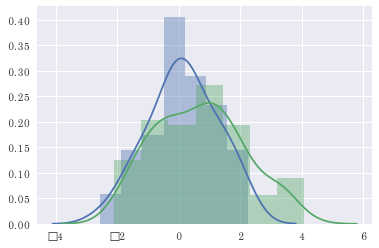

In [10]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0,1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
sns.distplot(x1)
sns.distplot(x2)
plt.show()

In [11]:
sp.stats.ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.23000000000000004, pvalue=0.049516112814422863)